In [270]:
import pandas as pd
import io

import numpy as np



In [232]:
t1_trip =  pd.read_csv("D:/xyz/data/t_trip_details.csv")

In [233]:
trip=[t1_trip]
print(t1_trip.head(20))
t1_trip.shape

    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
0   338862    3698        1354        1058          NaN      1064273110   
1   338863    3698        1354        1058          NaN      1064296792   
2   338864    3698        1354        1058          NaN      1064301612   
3   338865    3698        1354        1058          NaN      1064308695   
4   338866    3698        1354        1058          NaN      1064321083   
5   338867    3698        1354        1058          NaN      1064341105   
6   338868    3698        1354        1058          NaN      1064341850   
7   338869    3698        1354        1058          NaN      1064377781   
8   338874    4128        1387        1058          NaN      1064274544   
9   338875    3743        1389        1058          NaN      1062469700   
10  338876    3743        1389        1058          NaN      1062494099   
11  338877    3743        1389        1058          NaN      1062505043   
12  338878    3743       

(40, 23)

In [234]:
duplicatedcar = t1_trip.car_id.duplicated()


In [235]:
print(duplicatedcar.head(30)) 

ucar =(t1_trip[t1_trip.car_id.duplicated() == False ])
print(ucar.head(10))


0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9     False
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
Name: car_id, dtype: bool
    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
0   338862    3698        1354        1058          NaN      1064273110   
8   338874    4128        1387        1058          NaN      1064274544   
9   338875    3743        1389        1058          NaN      1062469700   
36  339183    3864        1498        1058          NaN      1070919606   

    src_ign  src_eng  src_dur  src_tdur         ...           \
0         0        0      NaN  183110.0         ...            
8         1        1      NaN   83301.0         ...            
9         0        0      NaN  139965.0       

In [236]:
print(ucar.duplicated())

0     False
8     False
9     False
36    False
dtype: bool


In [237]:
t1_trip['dest_nz_edt'] = pd.to_datetime(t1_trip.dest_nz_edt)

In [238]:
print(t1_trip.head(3))
t1_trip.dtypes

   ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
0  338862    3698        1354        1058          NaN      1064273110   
1  338863    3698        1354        1058          NaN      1064296792   
2  338864    3698        1354        1058          NaN      1064301612   

   src_ign  src_eng  src_dur  src_tdur         ...          \
0        0        0      NaN  183110.0         ...           
1        0        0      NaN  183141.0         ...           
2        0        0      NaN  183147.0         ...           

            src_nz_edt  dest_message_id  dest_ign dest_eng  dest_dur  \
0  2020-01-06 09:04:31       1064291589         1        1      30.0   
1  2020-01-06 09:42:58       1064299102         1        1       5.0   
2  2020-01-06 09:52:29       1064308077         1        1      11.0   

   dest_tdur  dest_odo  dest_latitude  dest_longitude         dest_nz_edt  
0   183141.0    2014.8     -43.463252      172.512490 2020-01-06 09:35:19  
1   183146.0 

ttd_id                      int64
car_id                      int64
car_number                  int64
project_id                  int64
driver_name               float64
src_message_id              int64
src_ign                     int64
src_eng                     int64
src_dur                   float64
src_tdur                  float64
src_odo                   float64
src_latitude              float64
src_longitude             float64
src_nz_edt                 object
dest_message_id             int64
dest_ign                    int64
dest_eng                    int64
dest_dur                  float64
dest_tdur                 float64
dest_odo                  float64
dest_latitude             float64
dest_longitude            float64
dest_nz_edt        datetime64[ns]
dtype: object

In [239]:
g= t1_trip.groupby('car_id')
for car_id, car_id_df in g:
    car_id_df['Day_of_Year']= t1_trip.dest_nz_edt.dt.dayofyear
    
    print (car_id)
    print (car_id_df)
    
   
    

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3698
    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
0   338862    3698        1354        1058          NaN      1064273110   
1   338863    3698        1354        1058          NaN      1064296792   
2   338864    3698        1354        1058          NaN      1064301612   
3   338865    3698        1354        1058          NaN      1064308695   
4   338866    3698        1354        1058          NaN      1064321083   
5   338867    3698        1354        1058          NaN      1064341105   
6   338868    3698        1354        1058          NaN      1064341850   
7   338869    3698        1354        1058          NaN      1064377781   
24  339055    3698        1354        1058          NaN      1065746783   
25  339056    3698        1354        1058          NaN      1065766277   
26  339057    3698        1354        1058          NaN      1065767708   
27  339058    3698        1354        1058          NaN      1065776222   
28  339059    3698  

3864
    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
36  339183    3864        1498        1058          NaN      1070919606   
37  339184    3864        1498        1058          NaN      1070953773   

    src_ign  src_eng  src_dur  src_tdur     ...       dest_message_id  \
36        0        0      NaN  107752.0     ...            1070922761   
37        0        0      NaN  107756.0     ...            1070954999   

    dest_ign  dest_eng dest_dur  dest_tdur  dest_odo  dest_latitude  \
36         1         1      3.0   107755.0     262.5     -43.468428   
37         1         1      2.0   107758.0     277.7     -43.504787   

    dest_longitude         dest_nz_edt  Day_of_Year  
36      172.537328 2020-01-10 11:26:15           10  
37      172.713825 2020-01-10 12:12:20           10  

[2 rows x 24 columns]
4128
    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
8   338874    4128        1387        1058          NaN      106427454

In [265]:

car_id3698 = t1_trip[(t1_trip.car_id == 3698)]
car_id3698['Day_of_Year']= t1_trip.dest_nz_edt.dt.dayofyear
car_id3698.sort_values(by=['dest_nz_edt'],inplace=True,ascending=False)
print(car_id3698.head(10))
car_id3698.shape

    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
39  339188    3698        1354        1058          NaN      1070914769   
38  339187    3698        1354        1058          NaN      1070873073   
31  339062    3698        1354        1058          NaN      1067374442   
30  339061    3698        1354        1058          NaN      1067365939   
29  339060    3698        1354        1058          NaN      1065890674   
28  339059    3698        1354        1058          NaN      1065780153   
27  339058    3698        1354        1058          NaN      1065776222   
26  339057    3698        1354        1058          NaN      1065767708   
25  339056    3698        1354        1058          NaN      1065766277   
24  339055    3698        1354        1058          NaN      1065746783   

    src_ign  src_eng  src_dur  src_tdur     ...       dest_message_id  \
39        0        0      NaN  184608.0     ...            1070925389   
38        0        0      Na

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(18, 24)

In [264]:
car_id4128=t1_trip[(t1_trip.car_id == 4128)]
car_id4128['Day_of_Year']= t1_trip.dest_nz_edt.dt.dayofyear
car_id4128.sort_values(by=['dest_nz_edt'],inplace=True,ascending=False)
print(car_id4128.head(10))
car_id4128.shape

    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
33  339101    4128        1387        1058          NaN      1067585326   
32  339100    4128        1387        1058          NaN      1067577499   
8   338874    4128        1387        1058          NaN      1064274544   

    src_ign  src_eng  src_dur  src_tdur     ...       dest_message_id  \
33        1        1      NaN   83474.0     ...            1067586013   
32        1        1      NaN   83472.0     ...            1067577815   
8         1        1      NaN   83301.0     ...            1064358371   

    dest_ign  dest_eng dest_dur  dest_tdur  dest_odo  dest_latitude  \
33         0         0      0.0    83475.0     595.4     -43.462713   
32         0         1      2.0    83474.0     589.8     -43.463047   
8          0         0    170.0    83472.0     589.7     -43.463357   

    dest_longitude         dest_nz_edt  Day_of_Year  
33      172.444752 2020-01-08 14:32:18            8  
32      172.5

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(3, 24)

In [263]:
car_id3743=t1_trip[(t1_trip.car_id == 3743)]
car_id3743['Day_of_Year']= t1_trip.dest_nz_edt.dt.dayofyear
car_id3743.sort_values(by=['dest_nz_edt'],inplace=True,ascending=False)
print(car_id3743.head(10))
car_id3743.shape

    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
35  339134    3743        1389        1058          NaN      1069415339   
34  339133    3743        1389        1058          NaN      1069372941   
23  338889    3743        1389        1058          NaN      1063647444   
22  338888    3743        1389        1058          NaN      1063579589   
21  338887    3743        1389        1058          NaN      1063501593   
20  338886    3743        1389        1058          NaN      1063488018   
19  338885    3743        1389        1058          NaN      1063487996   
18  338884    3743        1389        1058          NaN      1063478871   
17  338883    3743        1389        1058          NaN      1062708476   
16  338882    3743        1389        1058          NaN      1062708141   

    src_ign  src_eng  src_dur  src_tdur     ...       dest_message_id  \
35        0        0      NaN  140150.0     ...            1069426129   
34        0        0      Na

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(17, 24)

In [262]:
car_id3864=t1_trip[(t1_trip.car_id == 3864)]
car_id3864['Day_of_Year']= t1_trip.dest_nz_edt.dt.dayofyear
car_id3864.sort_values(by=['dest_nz_edt'],inplace=True,ascending=False)

print(car_id3864.head(10))
car_id3864.shape

    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
37  339184    3864        1498        1058          NaN      1070953773   
36  339183    3864        1498        1058          NaN      1070919606   

    src_ign  src_eng  src_dur  src_tdur     ...       dest_message_id  \
37        0        0      NaN  107756.0     ...            1070954999   
36        0        0      NaN  107752.0     ...            1070922761   

    dest_ign  dest_eng dest_dur  dest_tdur  dest_odo  dest_latitude  \
37         1         1      2.0   107758.0     277.7     -43.504787   
36         1         1      3.0   107755.0     262.5     -43.468428   

    dest_longitude         dest_nz_edt  Day_of_Year  
37      172.713825 2020-01-10 12:12:20           10  
36      172.537328 2020-01-10 11:26:15           10  

[2 rows x 24 columns]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2, 24)

In [244]:
t1_trip.dest_nz_edt.dt.dayofyear
t1_trip.shape
print(car_id_df)

    ttd_id  car_id  car_number  project_id  driver_name  src_message_id  \
8   338874    4128        1387        1058          NaN      1064274544   
32  339100    4128        1387        1058          NaN      1067577499   
33  339101    4128        1387        1058          NaN      1067585326   

    src_ign  src_eng  src_dur  src_tdur     ...       dest_message_id  \
8         1        1      NaN   83301.0     ...            1064358371   
32        1        1      NaN   83472.0     ...            1067577815   
33        1        1      NaN   83474.0     ...            1067586013   

    dest_ign  dest_eng dest_dur  dest_tdur  dest_odo  dest_latitude  \
8          0         0    170.0    83472.0     589.7     -43.463357   
32         0         1      2.0    83474.0     589.8     -43.463047   
33         0         0      0.0    83475.0     595.4     -43.462713   

    dest_longitude         dest_nz_edt  Day_of_Year  
8       172.513038 2020-01-06 11:57:24            6  
32      172.5

In [245]:

from matplotlib import pyplot as plt




In [246]:
    
%matplotlib inline
car_id3743.dtypes


ttd_id                      int64
car_id                      int64
car_number                  int64
project_id                  int64
driver_name               float64
src_message_id              int64
src_ign                     int64
src_eng                     int64
src_dur                   float64
src_tdur                  float64
src_odo                   float64
src_latitude              float64
src_longitude             float64
src_nz_edt                 object
dest_message_id             int64
dest_ign                    int64
dest_eng                    int64
dest_dur                  float64
dest_tdur                 float64
dest_odo                  float64
dest_latitude             float64
dest_longitude            float64
dest_nz_edt        datetime64[ns]
Day_of_Year                 int64
dtype: object

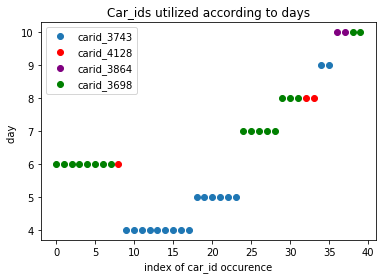

In [267]:
plt.plot(car_id3743.Day_of_Year,'o',label = 'carid_3743')
plt.plot(car_id4128.Day_of_Year,'o',color="red",label = 'carid_4128')
plt.plot(car_id3864.Day_of_Year,'o',color="purple", label = 'carid_3864')
plt.plot(car_id3698.Day_of_Year,'o',color="green", label='carid_3698')
plt.xlabel('index of car_id occurence')
plt.ylabel('day ')
plt.legend()
plt.title('Car_ids utilized according to days')
plt.show()

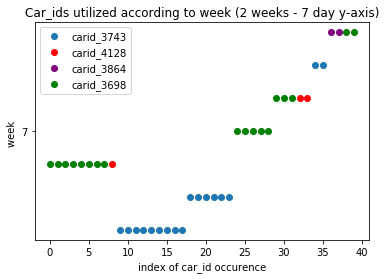

In [269]:
plt.plot(car_id3743.Day_of_Year,'o',label = 'carid_3743')
y = [7,14]
x = [5,10,15,20,25,30,35,40]

plt.yticks([0,7,14])
plt.plot(car_id4128.Day_of_Year,'o',color="red",label = 'carid_4128')
plt.plot(car_id3864.Day_of_Year,'o',color="purple", label = 'carid_3864')
plt.plot(car_id3698.Day_of_Year,'o',color="green", label='carid_3698')
plt.xlabel('index of car_id occurence')
plt.ylabel('week ')
plt.legend()
plt.title('Car_ids utilized according to week (2 weeks - 7 day y-axis)')
plt.show()

In [274]:
 # here is the trick save your figure into a bytes object and you can afterwards expose it via flas
def do_plot():
    bytes_image = io.BytesIO()
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    return bytes_image

In [275]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
	return ' <h1> Hello ! </h1>'